1. [INTRODUCTION](#1) <a id=18></a>
    - 1.1 [HEAD](#2)
    - 1.2 [DATA DICTIONARY](#17)
    - 1.3 [UNIQUE VALUES](#3)
    - 1.4 [CATEGORICAL AND CONTINUOUS VALUES](#4)
2. [EXPLORATORY DATA ANALYSIS](#5)
    - 2.1 [COUNT PLOT FOR CATEGORICAL VALUES](#6)
    - 2.2 [BOXEN PLOT FOR CONTINUOUS VALUES](#7)
    - 2.3 [COUNT PLOT FOR TARGET VARIABLE](#8)
    - 2.4 [CORRELATION MATRIX](#9)
    - 2.5 [DISTRIBUTION OF CONTINUOUS VARIABLE](#10)
    - 2.6 [DISTRIBUTION OF CATEGORICAL VARIABLES WITH OUTPUT](#11)
3. [DATA MODELING](#12)
    - 3.1 [K-NEIGHBOURS CLASSIFIER](#13)
    - 3.2 [LOGISTIC REGRESSION](#14)
    - 3.2 [DECISION TREE CLASSIFIER](#15)
    - 3.2 [RANDOM FOREST CLASSIFIER](#16)
4. [BAGGING](#18)
5. [FEATURE IMPORTANCE](#19)

# 1. INTRODUCTION <a id=1></a>

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/heartdataset1/heart.csv')
print('Shape :',df.shape)

Shape : (303, 14)


# 1.1 HEAD <a id=2></a>

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#  1.2 Data Dictionary <a id=17></a>


age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable

# 1.2 UNIQUE VALUES <a id=3></a>

In [7]:
unique_values_list = []
for i in df.columns:
    unique_values = df[i].nunique()
    unique_values_list.append({'Column': i , 'Unique_counts': unique_values})

unique_values_df = pd.DataFrame(unique_values_list)
unique_values_df

,Column,Unique_counts
0,age,41
1,sex,2
2,cp,4
3,trtbps,49
4,chol,152
5,fbs,2
6,restecg,3
7,thalachh,91
8,exng,2
9,oldpeak,40


# 1.4 CATEGORICAL AND CONTINUOUS COLUMNS <a id=4></a>

In [8]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


# 2. EXPLORATORY DATA ANALYSIS <a id=5></a>

# 2.1 COUNT PLOT FOR CATEGORICAL FEATURES <a id=6></a>

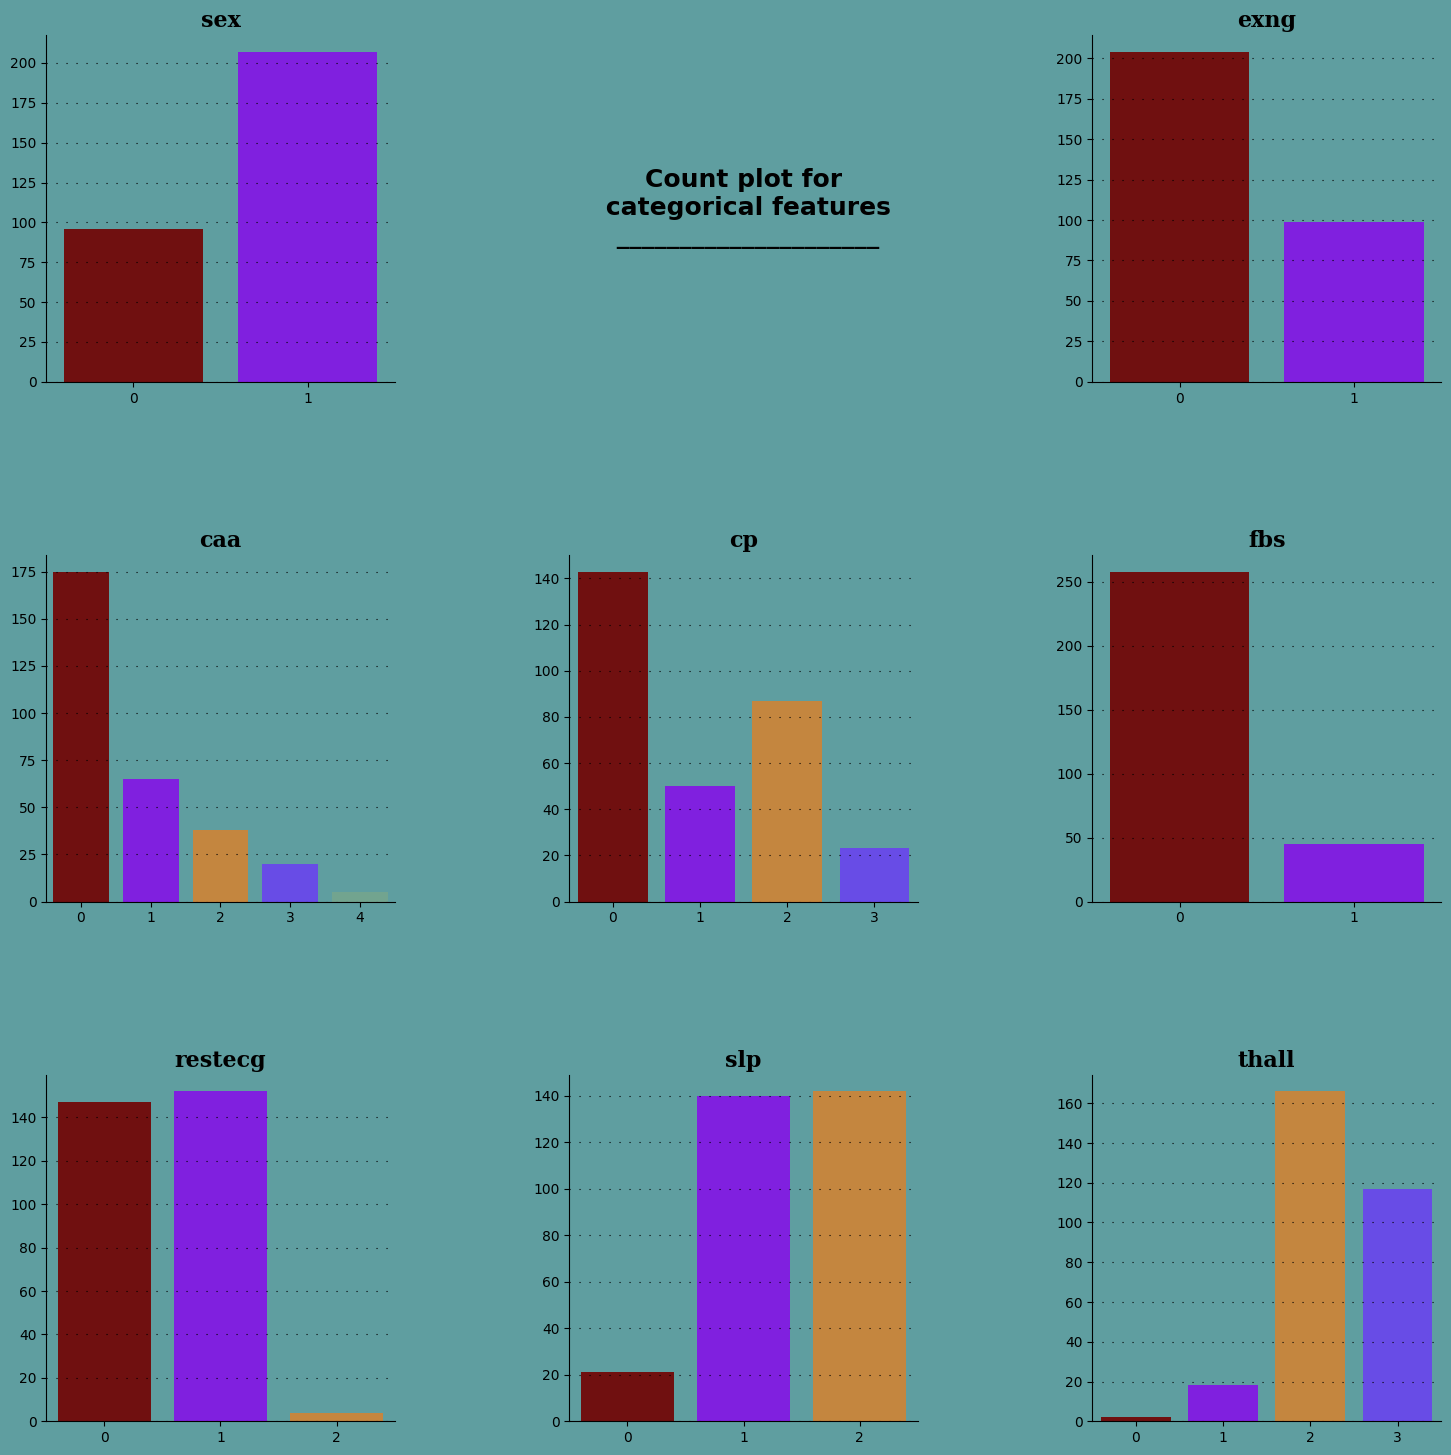

In [9]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#5f9ea0"
#color_palette = ["#80000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(left = False , bottom = False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.grid(False)
color_palette = ['#800000',"#8000ff","#6aac90","#5833ff","#da8829"]
ax1.text(.5,0.5,
         'Count plot for\n categorical features\n _____________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='sans serif',
         color="#000000")

list_of_plots = [ax0 ,ax2 ,ax3 , ax4 , ax5 , ax6 ,ax7,ax8]
for s in ['top' , 'right']:
    for i in list_of_plots:
        i.spines[s].set_visible(False)

def plot(plot , feature):
    plot.grid(color='#000000', linestyle='-', axis='y', zorder=5,  dashes=(1,8))
    sns.countplot(ax=plot,data=df,x=feature , palette = ["#800000","#8000ff","#da8829","#5833ff","#6aac90",])
    plot.set_xlabel("")
    plot.set_ylabel("")

for index,value in enumerate([ax0,ax2,ax3,ax4,ax5,ax6,ax7,ax8]):
    plot(value,cat_cols[index])

    
def plot_titles(plot, title):   
    y_lim = plot.get_ylim()
    x_lim = plot.get_xlim()
    plot.set_title(
        title,
        fontsize = 16, fontweight = 'bold',
        fontfamily  = 'serif'
        )
for index,value in enumerate([ax0,ax2,ax3,ax4,ax5,ax6,ax7,ax8]):
    plot_titles(value,cat_cols[index])
    


# 2.2 BOXEN PLOT FOR CONTINUOUS VARIABLES <a id=7></a>

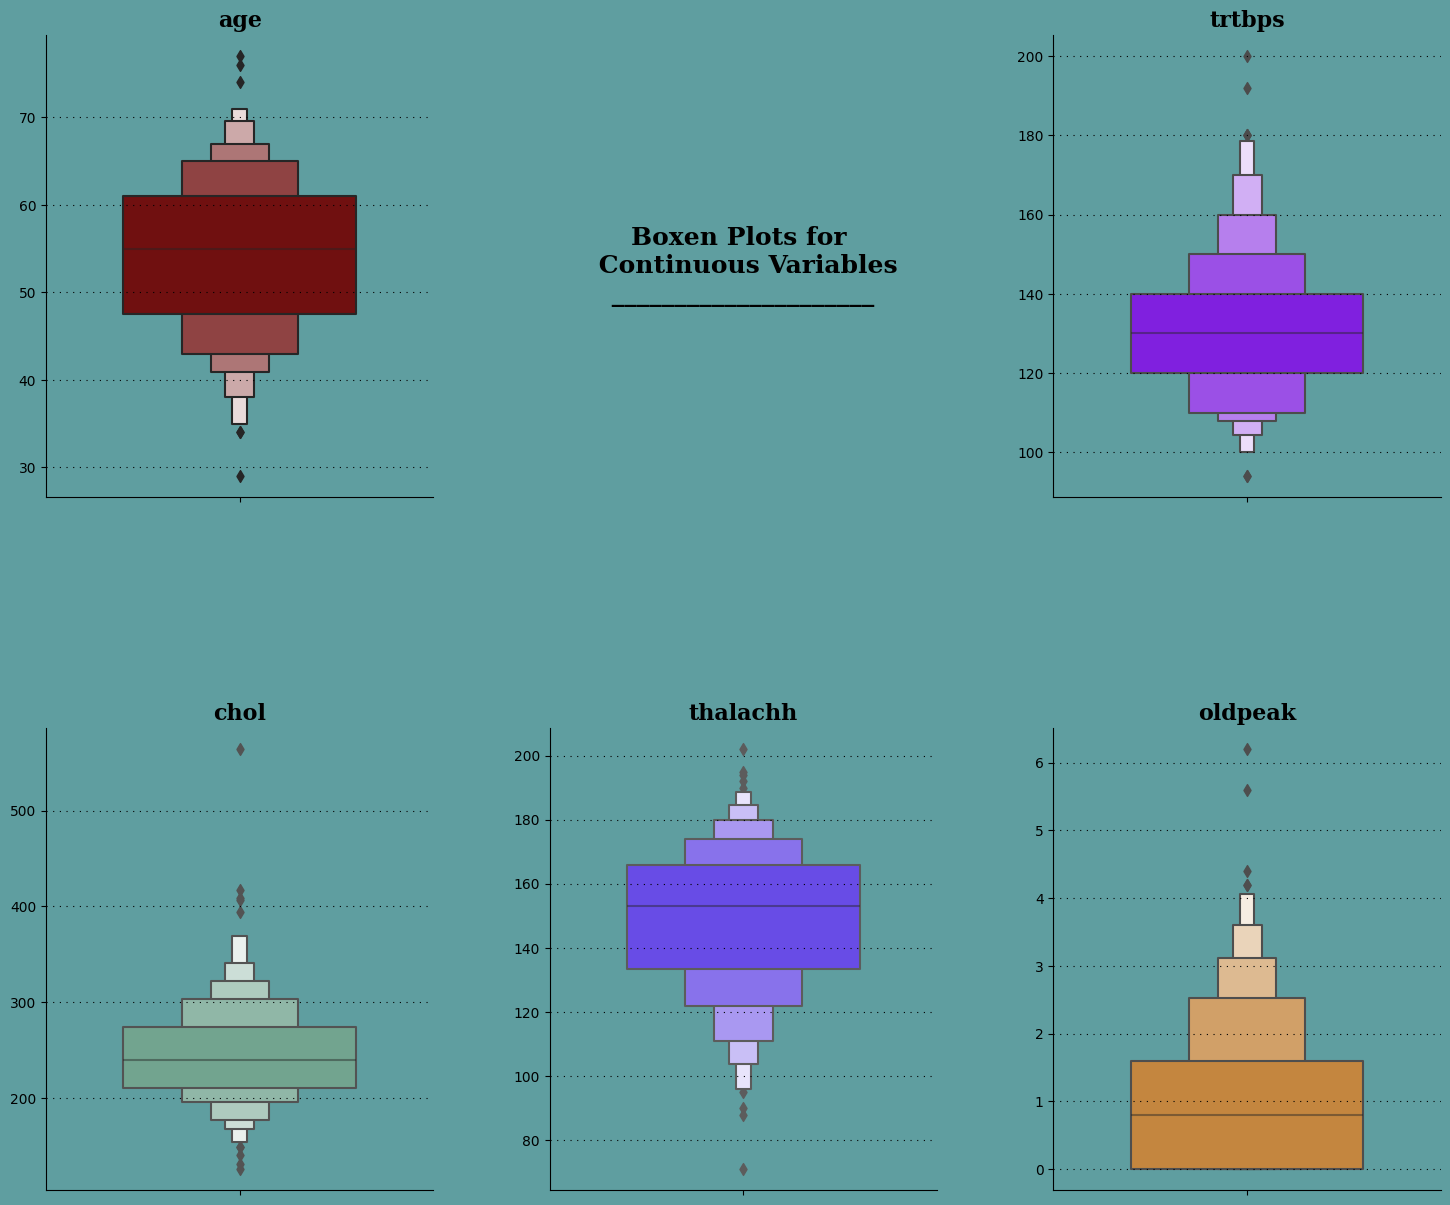

In [10]:
fig = plt.figure(figsize = (18,15))
gs = fig.add_gridspec(2,3)
gs.update( wspace = .3 , hspace = .5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])


list_of_conplots = [ax0,ax2,ax3,ax4,ax5]
fig.set_facecolor(background_color)
for i in list_of_conplots:
  i.set_facecolor(background_color)

ax1.set_facecolor(background_color)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(left = False , bottom = False)
ax1.grid(False)
for i in list_of_conplots:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.grid(False)
    
ax1.text(.5,.5 ,
         'Boxen Plots for \n Continuous Variables\n _____________________ ',
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontfamily = 'serif' , fontsize = 18 , fontweight = 'bold')

for n,i in enumerate(list_of_conplots):
    i.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns.boxenplot(ax=i,y=df[con_cols[n]],palette=[color_palette[n]],width=0.6)
    i.set_xlabel("")
    i.set_ylabel("")
    plot_titles(i , con_cols[n])


# 2.3 COUNT PLOT FOR TARGET VARIABLE <a id=8></a>

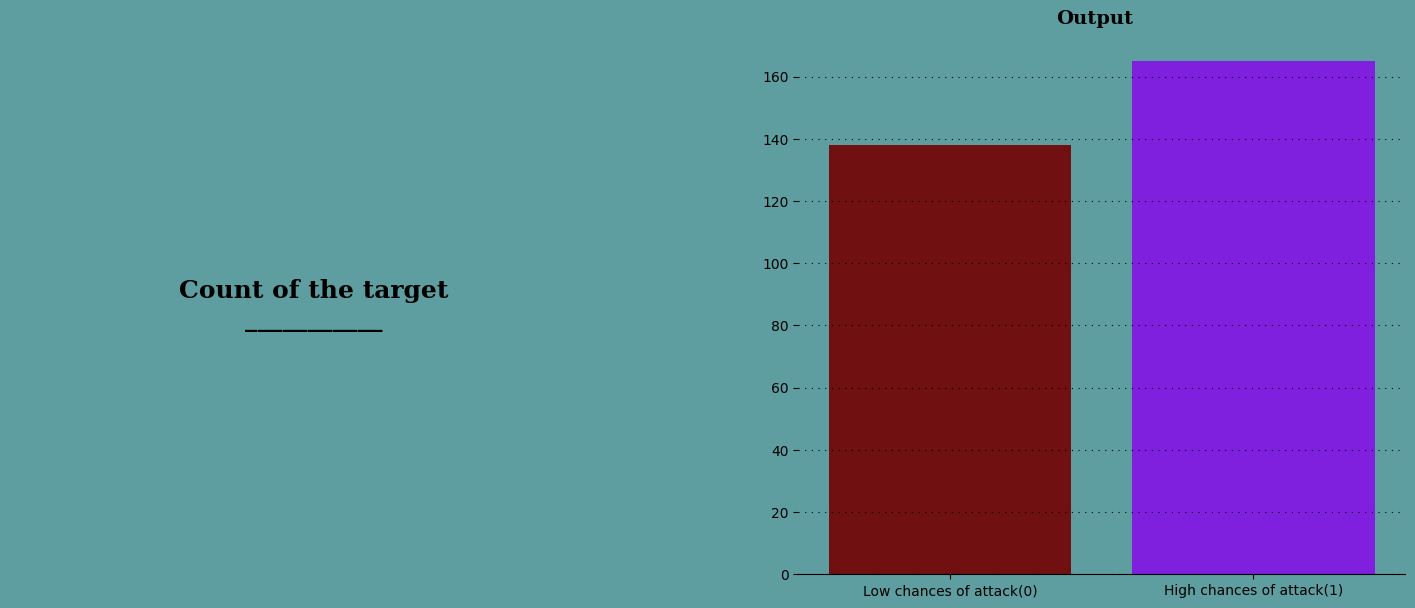

In [11]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.grid(False)
ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)


# 2.4 CORRELATION MATRIX <a id=9></a>

<Axes: >

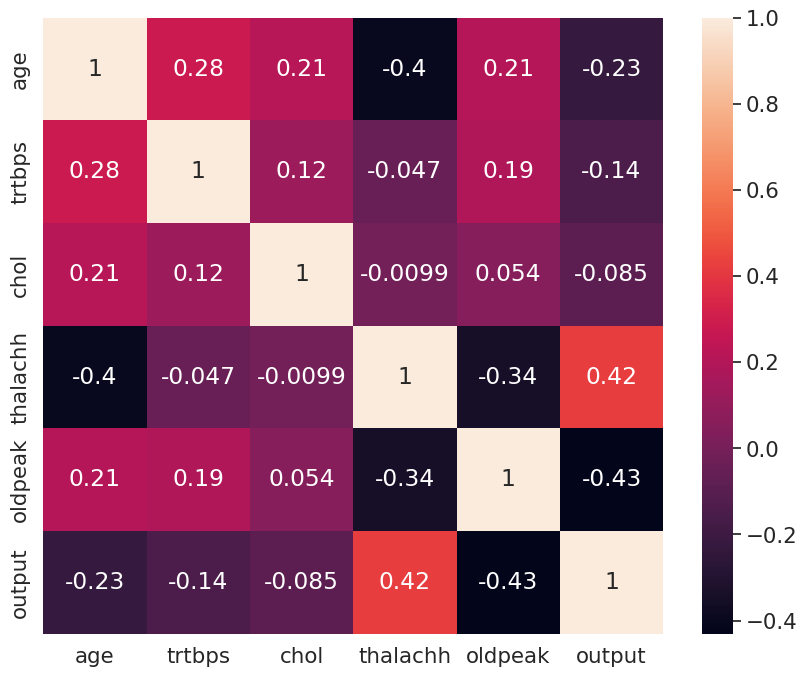

In [40]:
plt.figure(figsize = (10,8))
corr_matrix = df[con_cols+['output']].corr()
sns.heatmap(corr_matrix , annot = True , )

# 2.5 DISTRIBUTION OF CONTINUOUS VARIABLES WITH OUTPUT <a id=10></a>

<Axes: xlabel='oldpeak', ylabel='Density'>

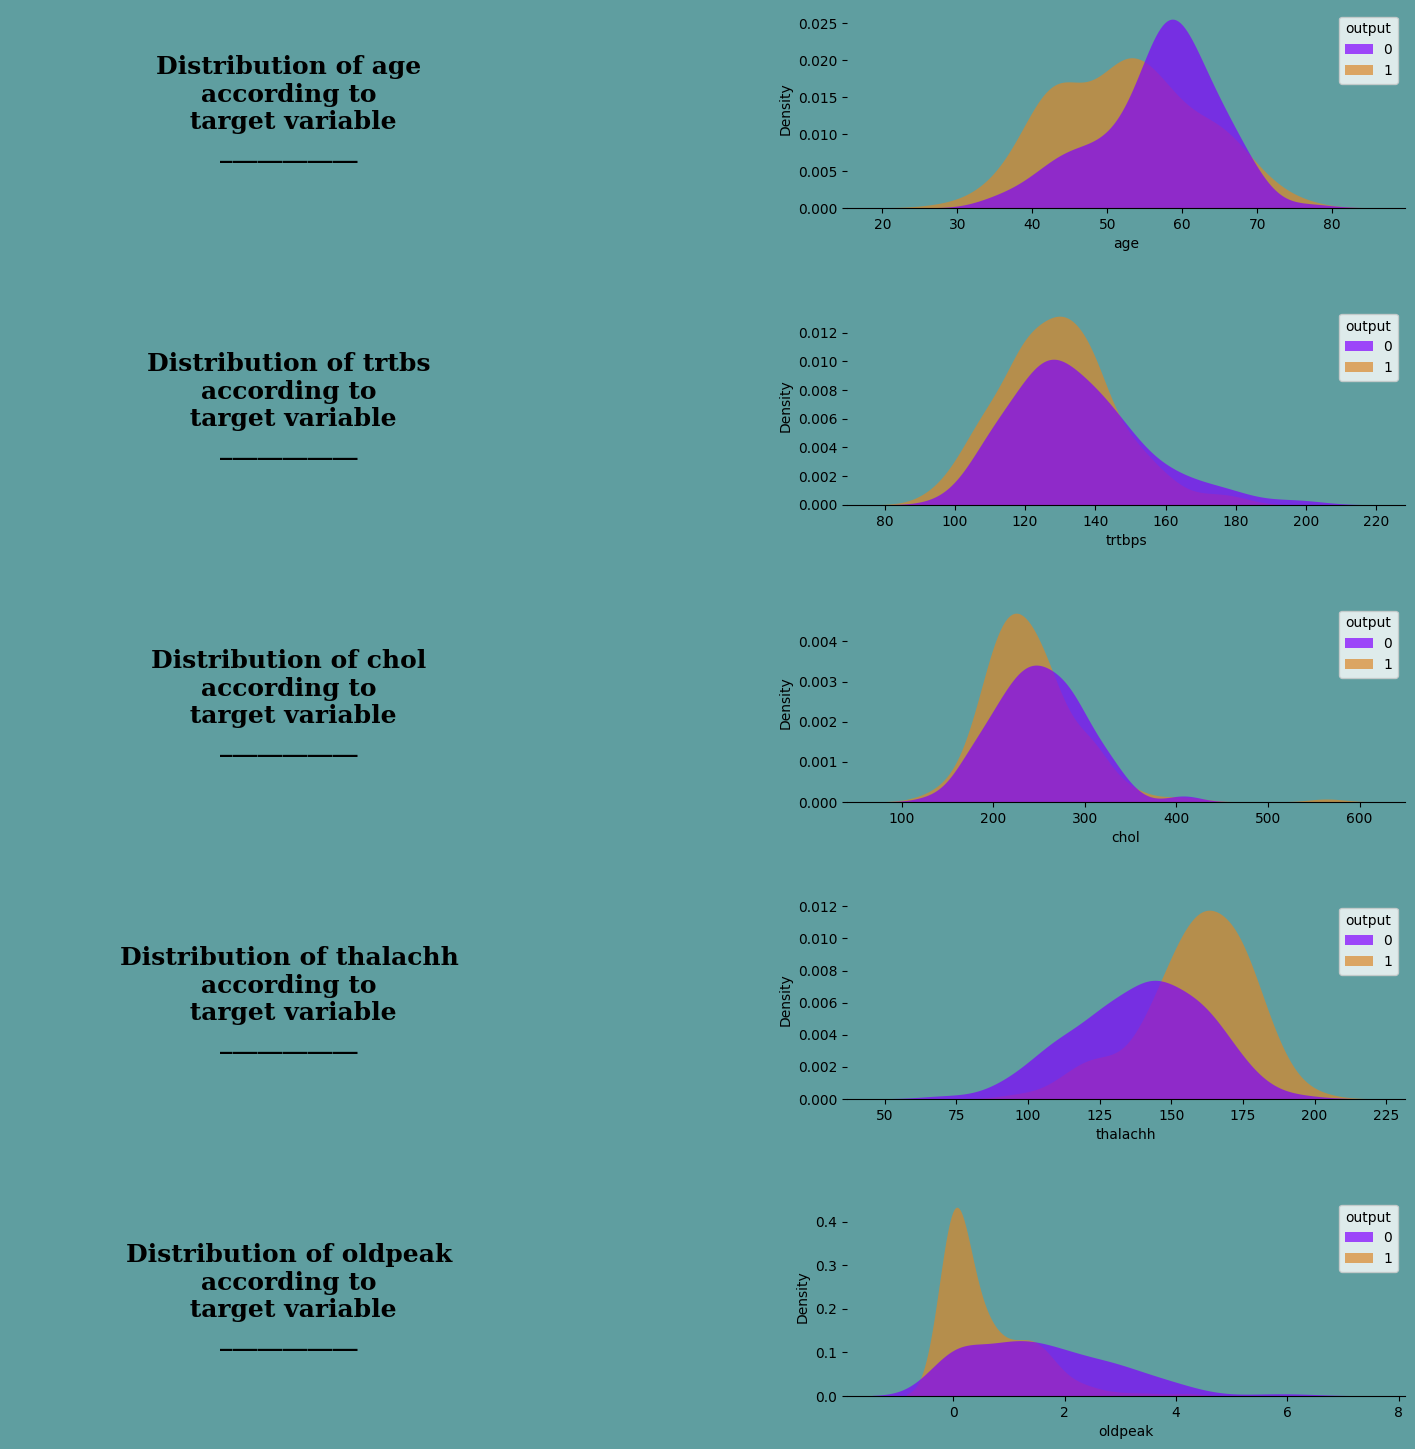

In [13]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
fig.set_facecolor(background_color)

distribution_con_plots = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
for i in distribution_con_plots:
    i.set_facecolor(background_color)

for i in [ax0,ax2,ax4,ax6,ax8]:
    i.spines['left'].set_visible(False)
    i.spines['bottom'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.set_xticklabels([])
    i.set_yticklabels([])
    i.tick_params(left = False , bottom = False)
    i.grid(False)
    
for i in [ax1,ax3,ax5,ax7,ax9]:
    i.spines['left'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.grid(False)
    
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(0.5,0.5,"Distribution of trtbs\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(0.5,0.5,"Distribution of thalachh\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

sns.kdeplot(ax=ax1, data=df, x='age',hue="output", fill = True ,palette=["#8000ff","#da8829"], alpha=.7, linewidth=0)
sns.kdeplot(ax=ax3, data=df, x='trtbps',hue="output", fill = True ,palette=["#8000ff","#da8829"], alpha=.7, linewidth=0)
sns.kdeplot(ax=ax5, data=df, x='chol',hue="output", fill = True ,palette=["#8000ff","#da8829"], alpha=.7, linewidth=0)
sns.kdeplot(ax=ax7, data=df, x='thalachh',hue="output", fill = True ,palette=["#8000ff","#da8829"], alpha=.7, linewidth=0)
sns.kdeplot(ax=ax9, data=df, x='oldpeak',hue="output", fill = True ,palette=["#8000ff","#da8829"], alpha=.7, linewidth=0)



# 2.6 DISTRIBUTION OF CATEGORICAL VARIABLES WITH OUTPUT <a id=11></a>

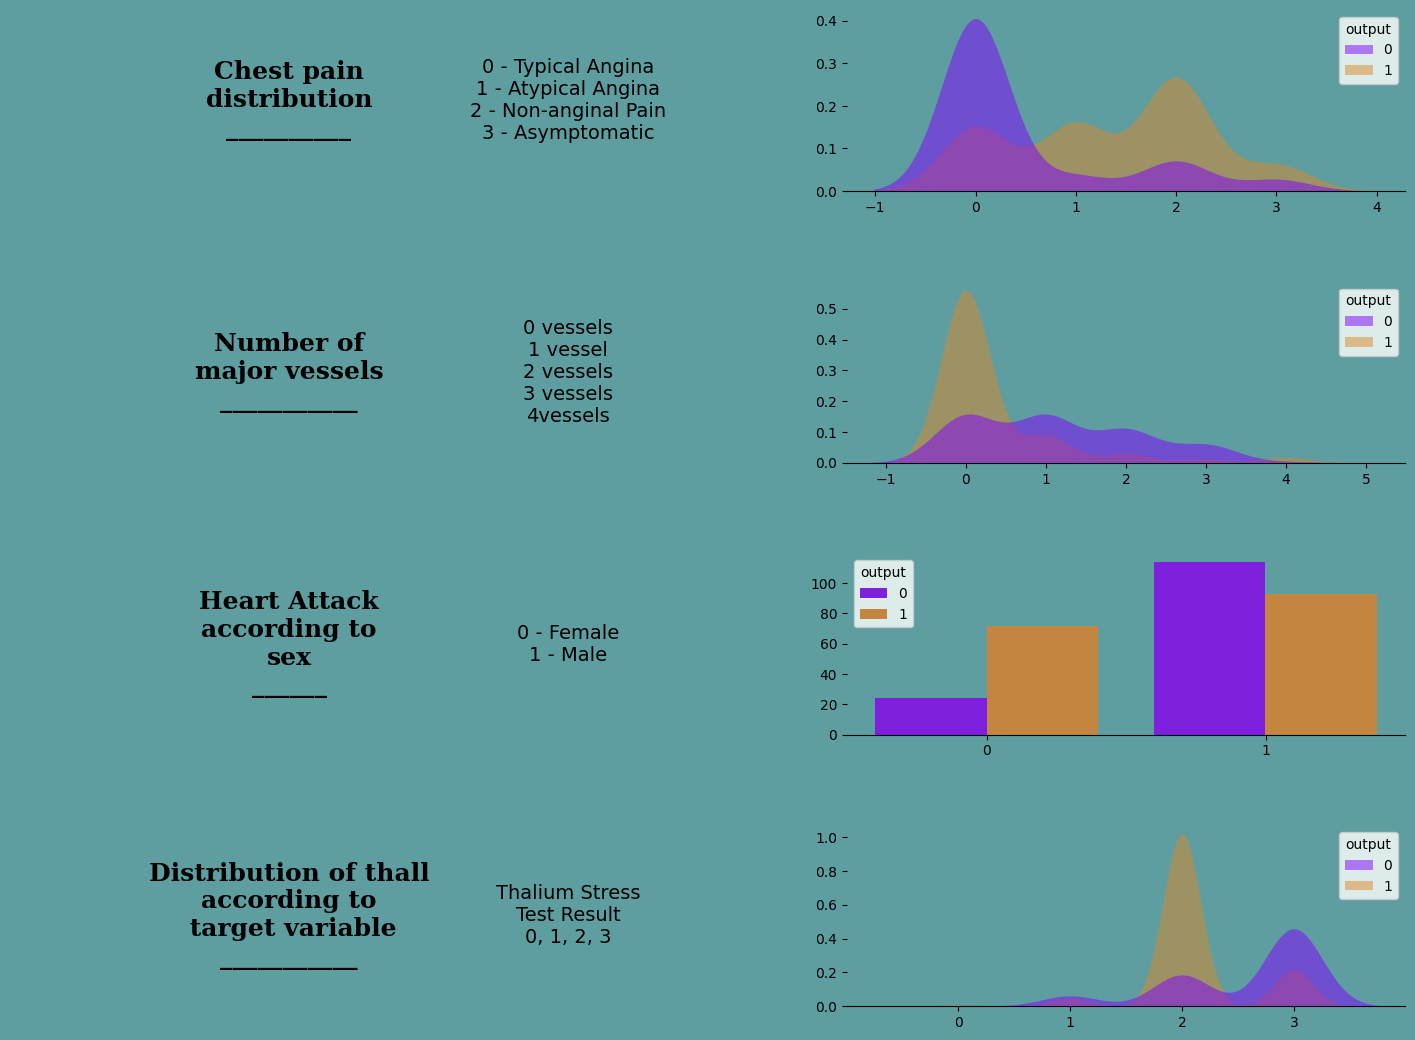

In [14]:
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])


color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)


# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Chest pain\ndistribution\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# Cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='cp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Caa title
ax2.text(0.5,0.5,"Number of\nmajor vessels\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 vessels\n1 vessel\n2 vessels\n3 vessels\n4vessels",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Caa
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='caa',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex title
ax4.text(0.5,0.5,"Heart Attack\naccording to\nsex\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='sex',palette=["#8000ff","#da8829"], hue='output')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thall title
ax6.text(0.5,0.5,"Distribution of thall\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thall
ax7.grid(False)
sns.kdeplot(ax=ax7, data=df, x='thall',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")



ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)



for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    
for i in [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]:
    i.grid(False)
  

# 2.6 Conclusions from the EDA

1. There are no null values in the data.
2. There are certain outliers in all the continuous features.
3. The data consists have twice the ratio of people with sex = 1 than sex = 0.
4. There is no apparent linear correlation between continuous variable according to the heatmap.
5. It is intuitive that elder people might have higher chances of heart attack but according to this dataset, this isnt the case.
6. According to the distribution plot of thalachh wrt output, people with higher maximum heart rate achieved have higher chances of heart attack.
7. According to the distribution plot of oldpeak wrt output, people with lower pevious peak achieved have higher chances of heart attack.
8. People with Non-Anginal chest pain, that is with cp = 2 have higher chances of heart attack.
9. People with 0 major vessels, that is with caa = 0 have high chance of heart attack.
10. People with sex = 1 have higher chance of heart attack.
11. People with thall = 2 have much higher chance of heart attack.
12. People with no exercise induced angina, that is with exng = 0 have higher chance of heart attack.

# 3. DATA MODELLING <a id=12></a>

In [15]:
one_hot_encoded_df = pd.get_dummies(df, columns=['cp','restecg', 'slp' , 'thall'])
df_for_training = one_hot_encoded_df.astype(int)

In [16]:
df_for_training

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,...,restecg_0,restecg_1,restecg_2,slp_0,slp_1,slp_2,thall_0,thall_1,thall_2,thall_3
0,63,1,145,233,1,150,0,2,0,1,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3,0,1,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
299,45,1,110,264,0,132,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
300,68,1,144,193,1,141,0,3,2,0,...,0,1,0,0,1,0,0,0,0,1
301,57,1,130,131,0,115,1,1,1,0,...,0,1,0,0,1,0,0,0,0,1


# 3.1 K-NEIGHBOUR CLASSIFIER <a id=13></a>

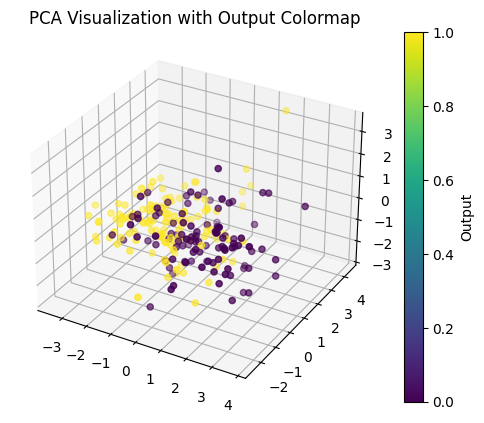

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df_for_training.drop('output' , axis =1)
Y = df_for_training['output']

X[con_cols] = scaler.fit_transform(X[con_cols])

X_train,X_test , Y_train , Y_test = train_test_split(X,Y , test_size = 0.2 , random_state = 42)

pca = PCA(n_components = 3)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=Y_train, cmap='viridis')

# ax.set_xlabel('Principal Component 1')
# ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Visualization with Output Colormap')
cbar = plt.colorbar(scatter)
cbar.set_label('Output')

plt.show()

In [18]:
knn_orignal = KNeighborsClassifier()
knn_orignal.fit(X_train,Y_train)
y_pred_orignal = knn_orignal.predict(X_test)
accuracy_orignal = accuracy_score(Y_test ,y_pred_orignal )
print('The accuracy score before Pca is',accuracy_orignal)

The accuracy score before Pca is 0.8524590163934426


In [19]:
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca,Y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(Y_test ,y_pred_pca )
print('The accuracy score after Pca is :',accuracy_pca)

The accuracy score after Pca is : 0.819672131147541


In [20]:
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f'Explained Variance Ratio for PC{i+1}: {ratio:.2f}')

Explained Variance Ratio for PC1: 0.25
Explained Variance Ratio for PC2: 0.14
Explained Variance Ratio for PC3: 0.10


In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors' : [11,13,15,17,19,21,23],
    'weights' :  ['uniform' , 'distance'],
    'algorithm': ['auto' , 'ball_tree' , 'kd_tree' , 'brute'],
    'leaf_size' : [10,20,30,40,50],
    'p' : [1,2]
}

grid_search = GridSearchCV(knn_orignal , param_grid , cv = 5 , scoring ='accuracy')
grid_search.fit(X_train,Y_train)

print("Best Parameters:", grid_search.best_params_)



Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}


In [22]:
knn_orignal_optimized = KNeighborsClassifier(n_neighbors = 13 , weights = 'uniform' , p=1 )
knn_orignal_optimized.fit(X_train,Y_train)
y_pred_orignal_optimized = knn_orignal_optimized.predict(X_test)
accuracy_orignal_optimized = accuracy_score(Y_test ,y_pred_orignal_optimized )
print('The accuracy after parameter tuning is',accuracy_orignal_optimized)

The accuracy after parameter tuning is 0.8852459016393442


Text(0.5, 1.0, 'KNN after Tuning (0.89)')

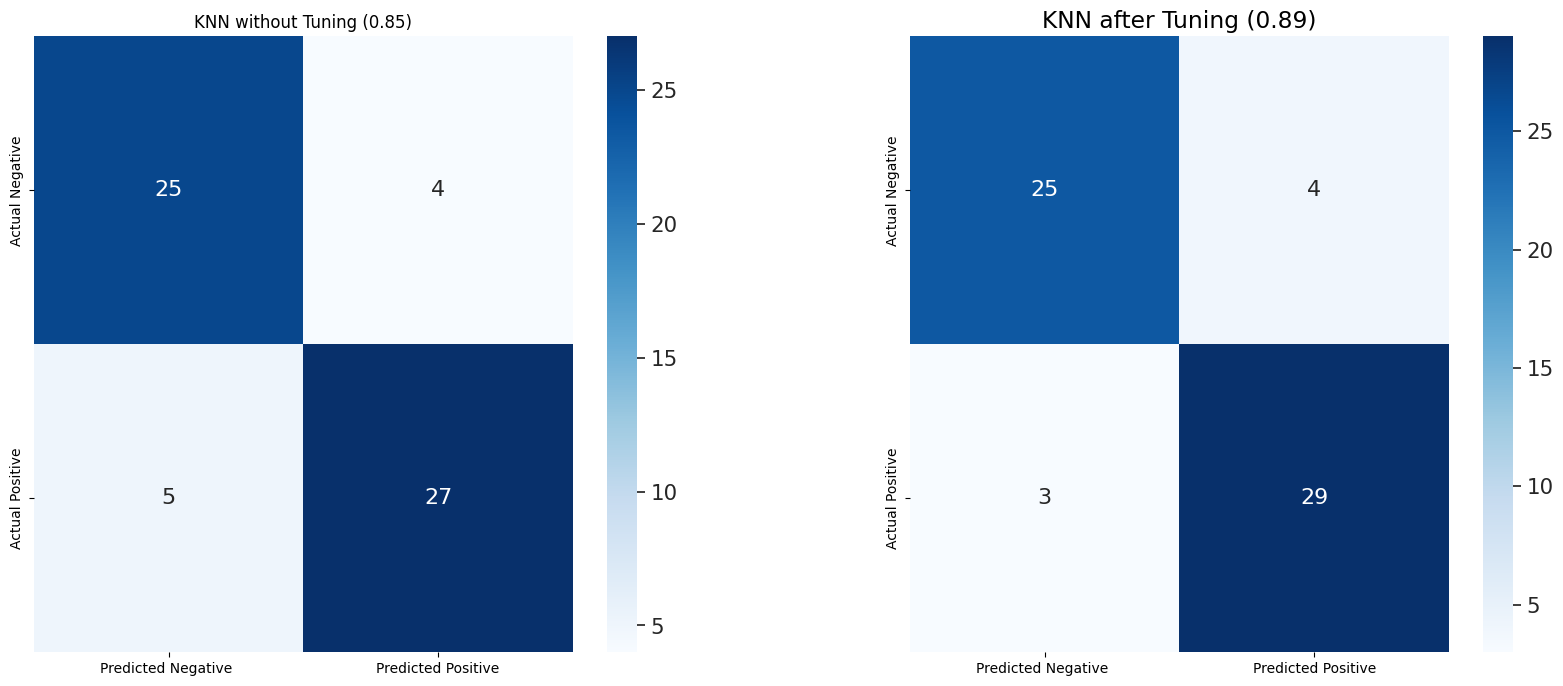

In [23]:
from sklearn.metrics import confusion_matrix
conf_matrix_orignal = confusion_matrix(Y_test , y_pred_orignal)
conf_matrix_optimized = confusion_matrix(Y_test , y_pred_orignal_optimized)

fig = plt.figure(figsize=(20, 8))
gs = fig.add_gridspec(1,2)
gs.update(wspace = 0.3 , hspace =.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax0.set_title(f'KNN without Tuning ({accuracy_orignal:.2f})')

sns.set(font_scale=1.4)  # Adjust font size for better readability
sns.heatmap(conf_matrix_orignal, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, 
            xticklabels=['Predicted Negative ', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'],
           ax = ax0,
           )

sns.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, 
            xticklabels=['Predicted Negative ', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'],
           ax = ax1,
           )
ax1.set_title(f'KNN after Tuning ({accuracy_orignal_optimized:.2f})')
            


In [24]:
knn_optimized_recall = KNeighborsClassifier(n_neighbors = 13 , weights = 'uniform' , p=1 )
knn_optimized_recall.fit(X_train,Y_train)
y_pred_recall_prob = knn_optimized_recall.predict_proba(X_test)[:,1]

threshold = 0.3
y_pred_recall = (y_pred_recall_prob >= threshold).astype(int)
accuracy_optimized_recall = accuracy_score(Y_test ,y_pred_recall )
print('The accuracy after recall tuning is',accuracy_optimized_recall)

The accuracy after recall tuning is 0.9016393442622951


<Axes: title={'center': 'KNN with recall Tuning (0.90)'}>

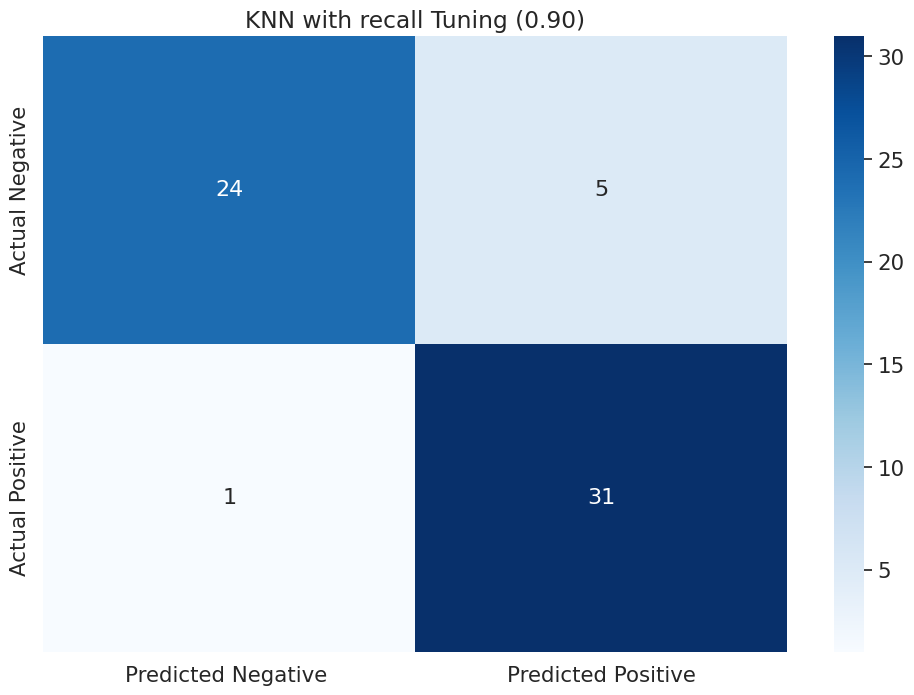

In [25]:
conf_matrix_recall = confusion_matrix(Y_test , y_pred_recall)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
ax.set_title(f'KNN with recall Tuning ({accuracy_optimized_recall:.2f})')

sns.set(font_scale=1.4)  # Adjust font size for better readability
sns.heatmap(conf_matrix_recall, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, 
            xticklabels=['Predicted Negative ', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'],
           ax =ax
           )

# 3.2 LOGISTIC REGRESSION <a id=14></a>

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

LR = LogisticRegression()
LR.fit(X_train, Y_train)
y_pred_lr = LR.predict(X_test)
y_prob = LR.predict_proba(X_test)[:, 1]

accuracy_lr = accuracy_score(Y_test , y_pred_lr)
print(f'The accuracy for Logistic Regression before Optimization is {accuracy_lr}')


roc_auc = roc_auc_score(Y_test, y_prob)
print("ROC AUC Score before Optimization:", roc_auc)

The accuracy for Logistic Regression before Optimization is 0.9016393442622951
ROC AUC Score before Optimization: 0.9493534482758621


In [27]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0, 0.1, 0.5,1, 10],  # Regularization strength
      # Solver to use for optimization
}

# Initialize Grid Search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, Y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

Best Parameters: {'C': 0.5, 'penalty': 'l2'}
Best ROC AUC Score: 0.892982942982943


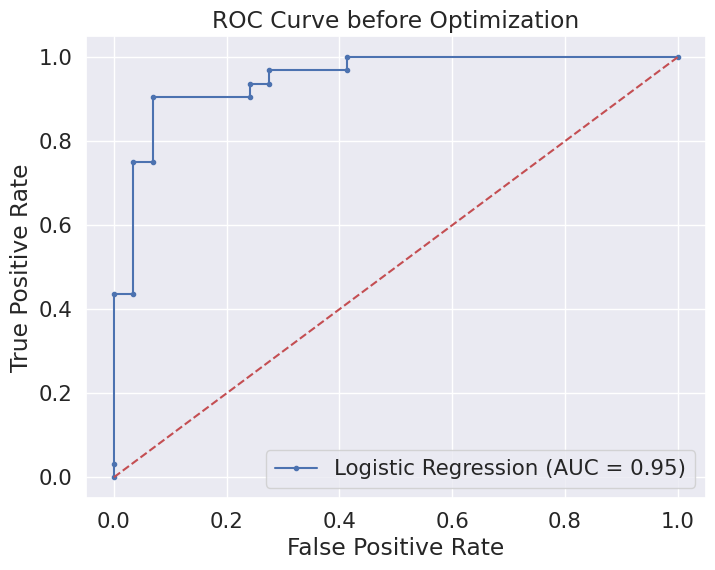

In [28]:
fpr, tpr, _ = roc_curve(Y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve before Optimization')
plt.legend()
plt.show()

In [29]:
LR_opt = LogisticRegression(C = 0.5 , penalty = 'l2' , class_weight = {0:1,1:15})
LR_opt.fit(X_train, Y_train)
y_pred_lr_opt = LR_opt.predict(X_test)
y_prob_opt = LR_opt.predict_proba(X_test)[:, 1]


accuracy_lr_opt = accuracy_score(Y_test , y_pred_lr_opt)
print(f'The accuracy for Logistic Regression after Optimization is {accuracy_lr_opt}')



roc_auc_opt = roc_auc_score(Y_test, y_prob_opt)
print("ROC AUC Score after optimization:", roc_auc_opt)

The accuracy for Logistic Regression after Optimization is 0.8360655737704918
ROC AUC Score after optimization: 0.9245689655172413


Text(0.5, 1.0, 'Logistic Regression after Optimization\n Accuracy:0.84 ROC-AUC Score:0.92 ')

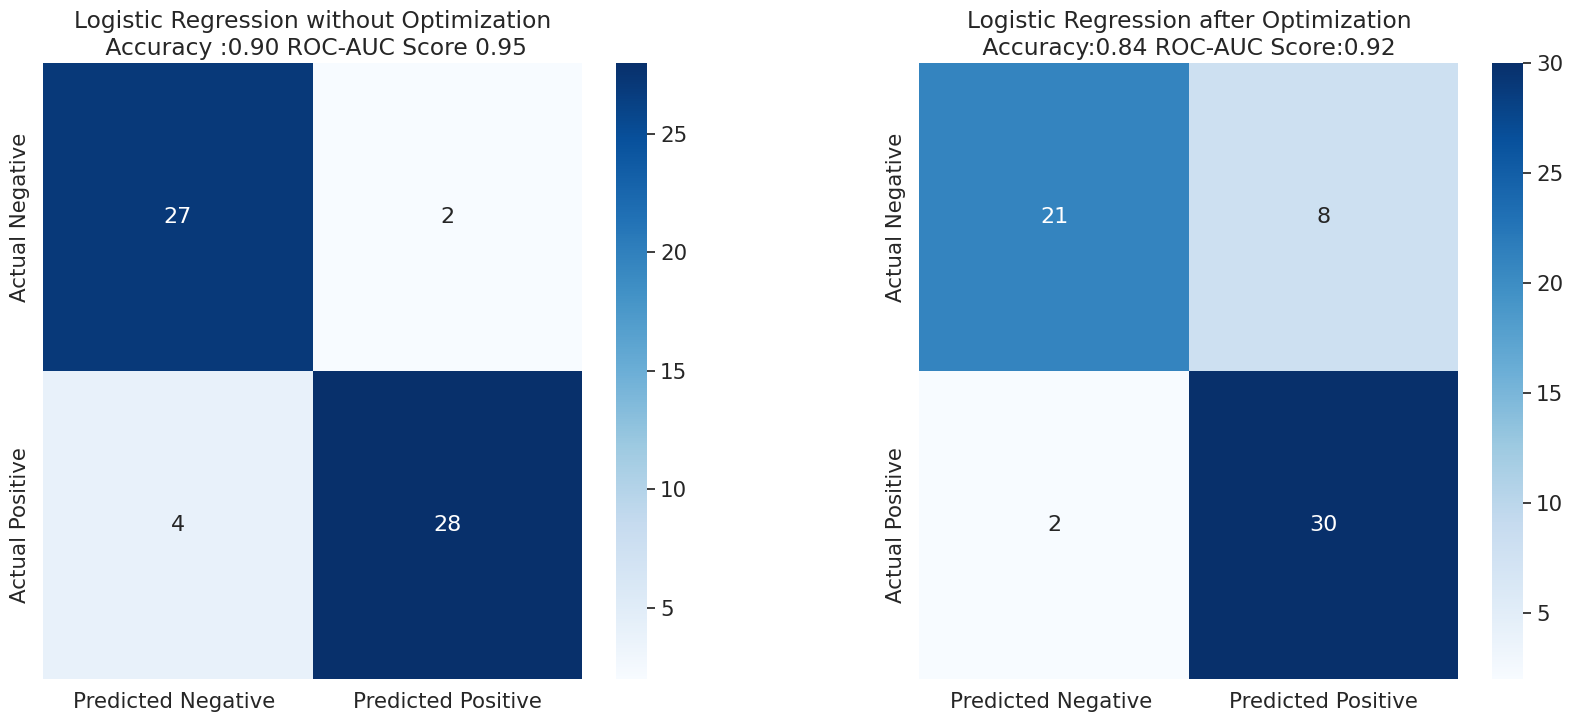

In [30]:
conf_matrix_lr = confusion_matrix(Y_test, y_pred_lr)
conf_matrix_lr_opt = confusion_matrix(Y_test, y_pred_lr_opt)

fig = plt.figure(figsize=(20, 8))
gs = fig.add_gridspec(1,2)
gs.update(wspace = 0.3 , hspace =.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax0.set_title(f'Logistic Regression without Optimization\n Accuracy :{accuracy_lr:.2f} ROC-AUC Score {roc_auc:.2f}')

sns.set(font_scale=1.4)  # Adjust font size for better readability
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, 
            xticklabels=['Predicted Negative ', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'],
           ax = ax0,
           )

sns.heatmap(conf_matrix_lr_opt, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, 
            xticklabels=['Predicted Negative ', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'],
           ax = ax1,
           )
ax1.set_title(f'Logistic Regression after Optimization\n Accuracy:{accuracy_lr_opt:.2f} ROC-AUC Score:{roc_auc_opt:.2f} ')


# 3.3 DECISION TREE CLASSIFIER <a id=15></a>

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)

y_prob_dt = dt.predict_proba(X_test)[:, 1]

accuracy_dt = accuracy_score(Y_test, y_pred_dt)
print(f'The accuracy for Decision Tree is {accuracy_dt}')

roc_auc_dt = roc_auc_score(Y_test, y_prob_dt)
print(f'The ROC AUC Score for Decision Tree is {roc_auc_dt}')

conf_matrix_dt = confusion_matrix(Y_test, y_pred_dt)


The accuracy for Decision Tree is 0.7704918032786885
The ROC AUC Score for Decision Tree is 0.7731681034482758


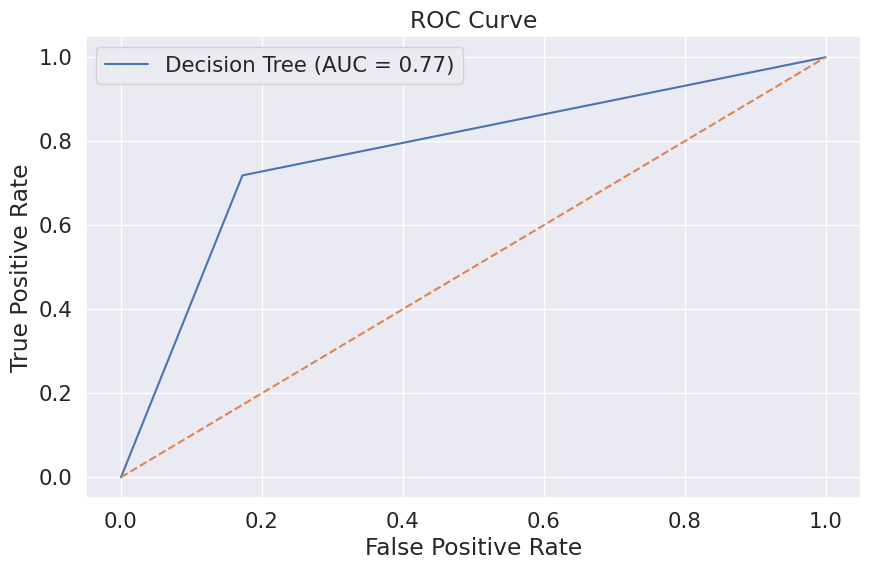

In [32]:
fpr, tpr, thresholds = roc_curve(Y_test, y_prob_dt)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced',{0: 1, 1: 15}]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',  # Change scoring to accuracy
                           n_jobs=-1,
                           verbose=0)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_

best_dt = DecisionTreeClassifier(**best_params, random_state=42)
best_dt.fit(X_train, Y_train)

y_pred_best_dt = best_dt.predict(X_test)
y_prob_best_dt = best_dt.predict_proba(X_test)[:, 1]

accuracy_best_dt = accuracy_score(Y_test, y_pred_best_dt)
roc_auc_best_dt = roc_auc_score(Y_test, y_prob_best_dt)
print(f'The optimized accuracy for Decision Tree is {accuracy_best_dt}')
print(f'The optimized ROC-AUC for Decision Tree is {roc_auc_best_dt}')

conf_matrix_best_dt = confusion_matrix(Y_test, y_pred_best_dt)


The optimized accuracy for Decision Tree is 0.8032786885245902
The optimized ROC-AUC for Decision Tree is 0.8001077586206896


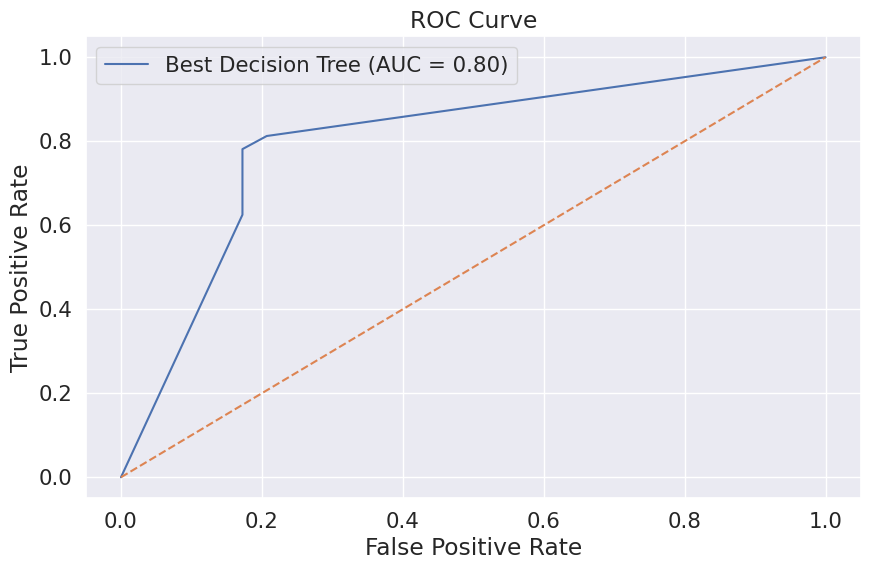

In [34]:
fpr_best, tpr_best, thresholds_best = roc_curve(Y_test, y_prob_best_dt)
plt.figure(figsize=(10, 6))
plt.plot(fpr_best, tpr_best, label=f'Best Decision Tree (AUC = {roc_auc_best_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

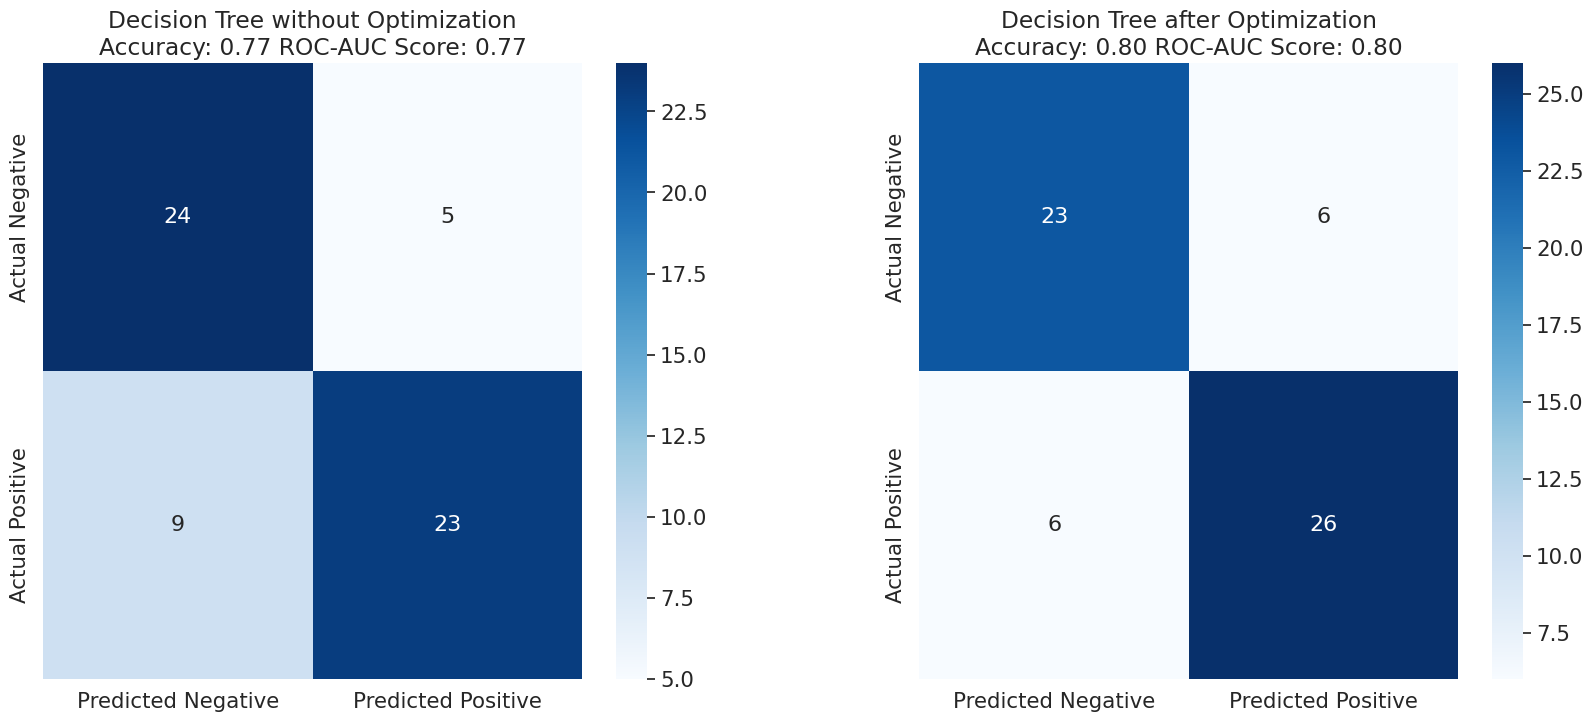

In [44]:
fig = plt.figure(figsize=(20, 8))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax0.set_title(f'Decision Tree without Optimization\nAccuracy: {accuracy_dt:.2f} ROC-AUC Score: {roc_auc_dt:.2f}')

sns.set(font_scale=1.4)  
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'],
            ax=ax0)

sns.heatmap(conf_matrix_best_dt, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'],
            ax=ax1)
ax1.set_title(f'Decision Tree after Optimization\nAccuracy: {accuracy_best_dt:.2f} ROC-AUC Score: {roc_auc_best_dt:.2f}')

plt.show()

# 3.4 RANDOM FOREST CLASSIFIER <a id=16></a>

In [50]:
from sklearn.ensemble import RandomForestClassifier , VotingClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(Y_test, y_pred_rf)
print(f'The accuracy for Random Forest is {accuracy_rf}')

conf_matrix_rf = confusion_matrix(Y_test, y_pred_rf)



The accuracy for Random Forest is 0.8852459016393442


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1)

grid_search_rf.fit(X_train, Y_train)

best_params_rf = grid_search_rf.best_params_

best_rf = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf.fit(X_train, Y_train)

y_pred_best_rf = best_rf.predict(X_test)

accuracy_best_rf = accuracy_score(Y_test, y_pred_best_rf)
print(f'The optimized accuracy for Random Forest is {accuracy_best_rf}')

conf_matrix_best_rf = confusion_matrix(Y_test, y_pred_best_rf)



The optimized accuracy for Random Forest is 0.9016393442622951


The accuracy for Random Forest is 0.8852459016393442
The ROC AUC for Random Forest is 0.9283405172413792
The optimized accuracy for Random Forest is 0.9016393442622951
The optimized ROC AUC for Random Forest is 0.9310344827586207


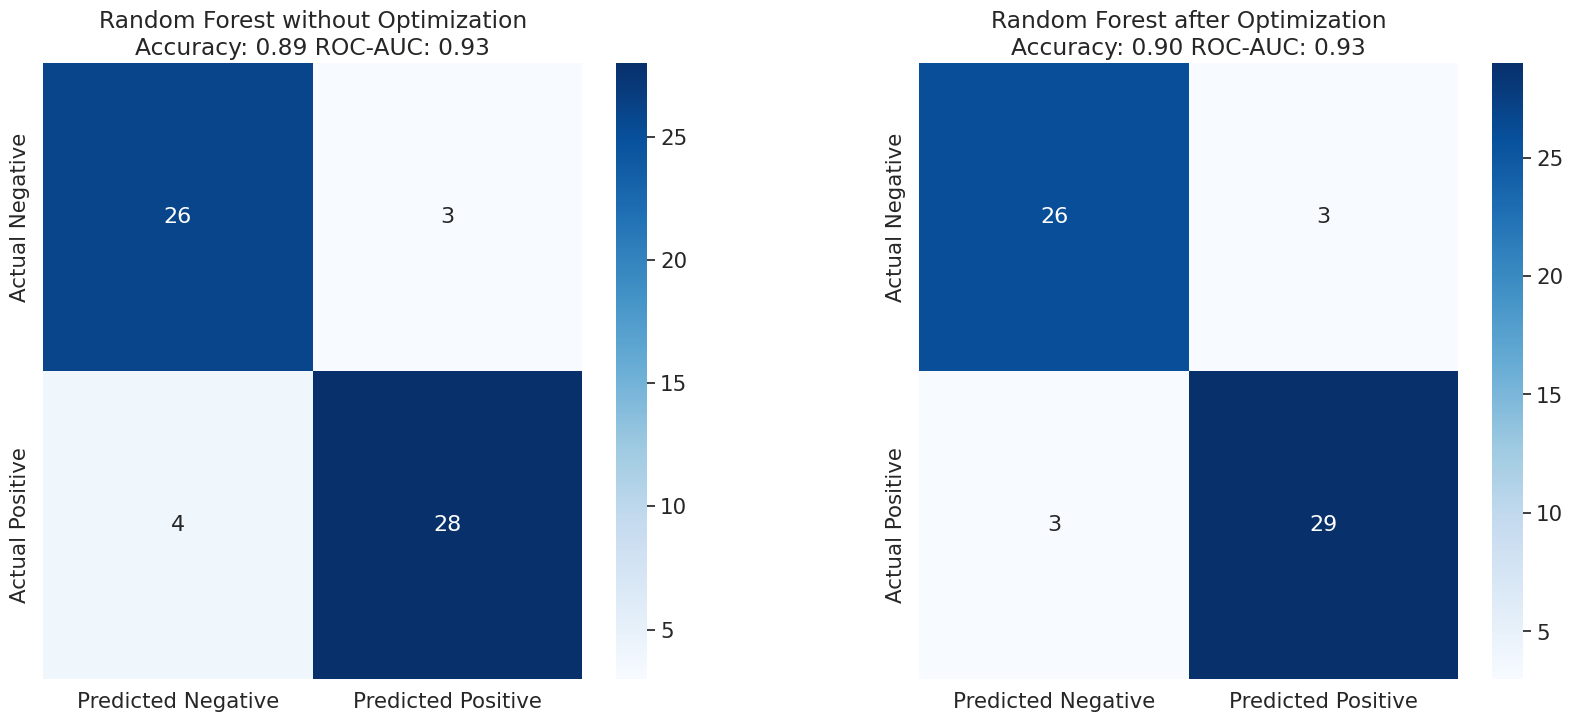

In [38]:

fig = plt.figure(figsize=(20, 8))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0.5)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

ax0.set_title(f'Random Forest without Optimization\nAccuracy: {accuracy_rf:.2f} ROC-AUC: {roc_auc_rf:.2f}')
sns.set(font_scale=1.4)  # Adjust font size for better readability
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'],
            ax=ax0)

ax1.set_title(f'Random Forest after Optimization\nAccuracy: {accuracy_best_rf:.2f} ROC-AUC: {roc_auc_best_rf:.2f}')
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'],
            ax=ax1)

plt.show()


# 4. BAGGING <a id=18></a>

Accuracy of Voting Classifier: 0.90


<Axes: title={'center': 'Bagging with Hard Voting (0.90)'}>

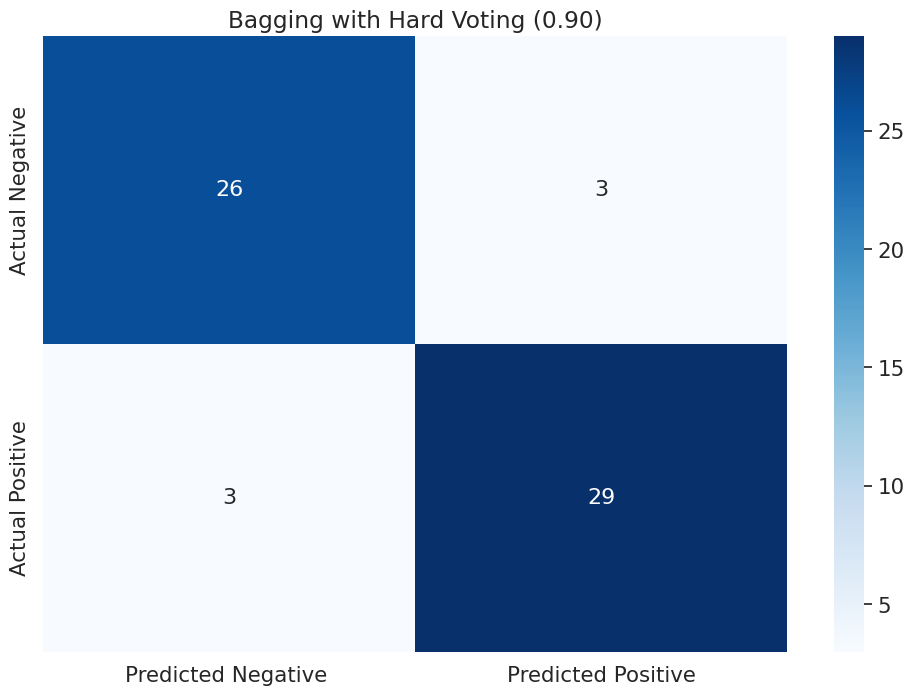

In [58]:
voting_clf_hard = VotingClassifier(
    estimators=[('knn', knn_optimized_recall), ('log_reg', LR_opt), ('dec_tree', best_dt), ('rand_forest', best_rf)],
    voting='hard'  # Use 'soft' for probability-based voting
)
voting_clf_hard.fit(X_train, Y_train)
y_pred_ensemble = voting_clf_hard.predict(X_test)

# Evaluate the accuracy
accuracy_ensemble = accuracy_score(Y_test, y_pred_ensemble)
print(f'Accuracy of Voting Classifier: {accuracy_ensemble:.2f}')

conf_matrix_ensemble = confusion_matrix(Y_test , y_pred_ensemble)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
ax.set_title(f'Bagging with Hard Voting ({accuracy_optimized_recall:.2f})')

sns.set(font_scale=1.4)  # Adjust font size for better readability
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, 
            xticklabels=['Predicted Negative ', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'],
           ax =ax
           )

# 5. FEATURE IMPORTANCE <a id=19></a>

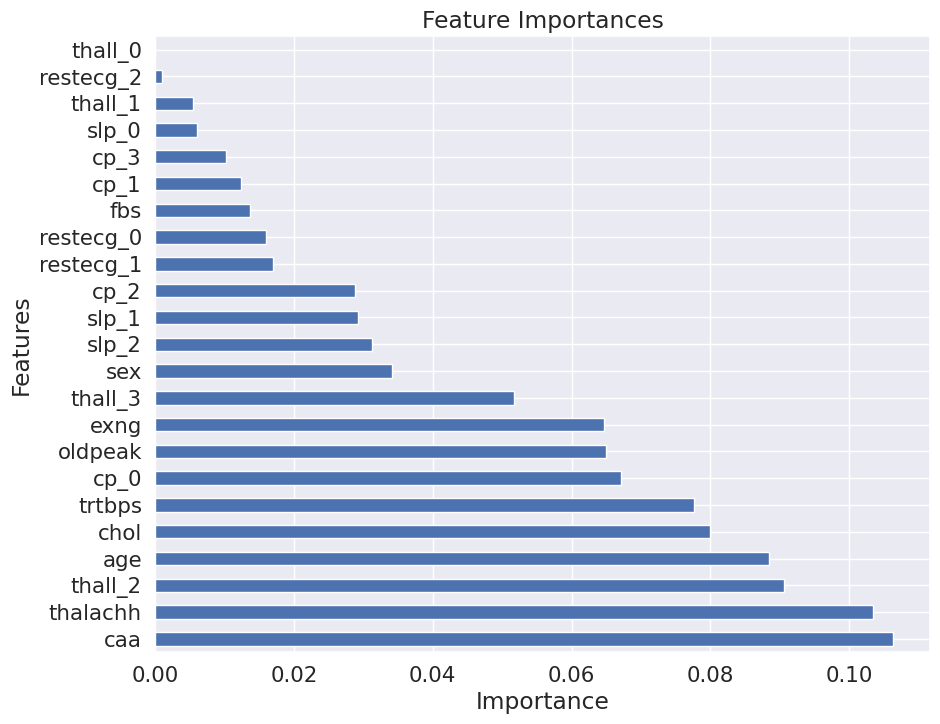

In [49]:
importances = RandomForestClassifier().fit(X_train, Y_train).feature_importances_
plt.figure(figsize=(10,8))
feature_names = X_train.columns
feature_importance = pd.Series(importances, index=feature_names)
feature_importance.sort_values(ascending=False).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()